In [1]:
from cpclasses import *


Acceptance rate: 91.87%


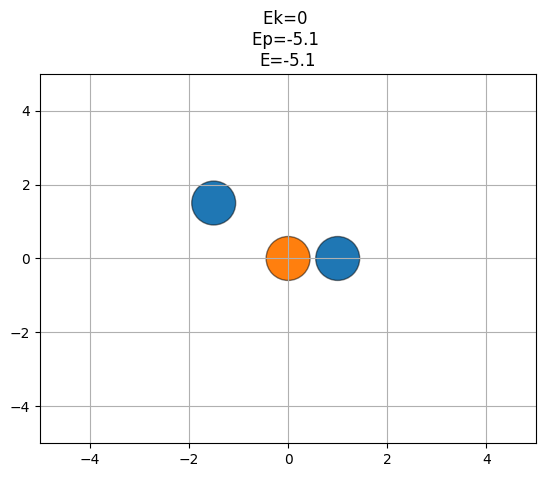

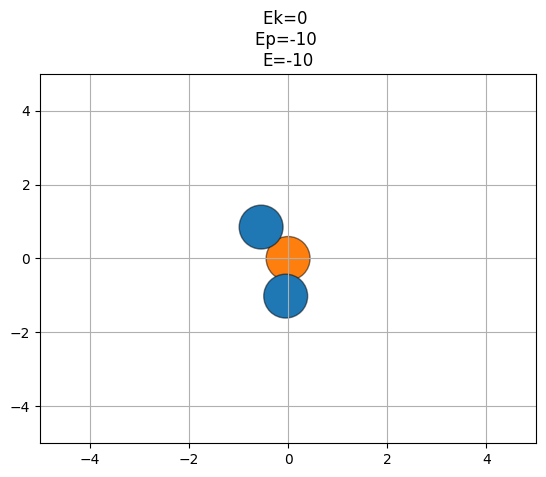

In [7]:
import numpy as np
import matplotlib.pyplot as plt


x_range = [-5, 5]
y_range = [-5, 5]
# Assuming LennardJones and AtomicCluster are defined elsewhere
LJ = LennardJones()

positions = np.array([[0, 0], [-1.5, 1.5], [1, 0]])
cluster = AtomicCluster(calc=LJ, pos=positions)
cluster.static = np.array([True, False, False])

fig, ax = plt.subplots()
ax.set(xlim= x_range, ylim= y_range)
cluster.draw(ax, size=1000)

ax.grid()

def mcmc_nd(cluster, n_steps=1000, T=1.0):
    positions = cluster.pos
    accepted = 0
    for i in range(n_steps):
        # Generate random steps
        step = np.random.normal(0, 0.01, positions.shape)
        # Only update non-static atoms
        step = np.where(cluster.static[:, None], 0, step)
        new_positions = positions + step

        # Compute old and new energies
        E_old = cluster.potential_energy
        cluster.pos = new_positions
        E_new = cluster.potential_energy

        # Metropolis acceptance criterion
        if np.random.rand() < np.exp(-(E_new - E_old) / T):
            positions = new_positions
            accepted += 1
        else:
            cluster.pos = positions

    print(f"Acceptance rate: {accepted / n_steps * 100:.2f}%")
    return positions

# Run the MCMC simulation
mcmc_nd(cluster, n_steps=10000, T=0.5)

# Plot the updated cluster positions
fig, ax = plt.subplots()
ax.set(xlim= x_range, ylim= y_range)
cluster.draw(ax, size=1000)

ax.grid()


Acceptance rate: 70.74%


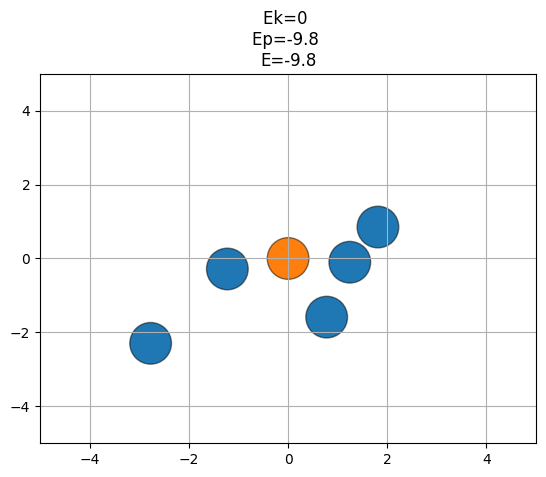

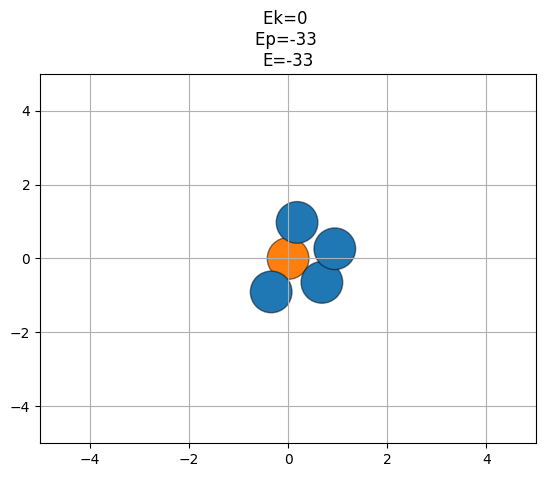

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x_range = [-5, 5]
y_range = [-5, 5]
# Assuming LennardJones and AtomicCluster are defined elsewhere
LJ = LennardJones()

positions = np.array([[0, 0], [-1.5, 1.5], [1, 0]])
cluster = AtomicCluster(calc=LJ, N = 6)
cluster.static[0] = True
cluster.pos[0] = [0,0]

fig, ax = plt.subplots()
cluster.draw(ax, size=900)
ax.set(xlim= x_range, ylim= y_range)
ax.grid()

# Run the MCMC simulation
mcmc_nd(cluster, n_steps=50000, T=0.5)

# Plot the updated cluster positions
fig, ax = plt.subplots()
cluster.draw(ax, size=900)
ax.set(xlim= x_range, ylim= y_range)
ax.grid()


Acceptance rate: 67.95%
Acceptance rate: 62.57%


C:\Users\tobia\AppData\Local\Temp\ipykernel_24676\230518098.py:36: RuntimeWarning: overflow encountered in exp
  if np.random.rand() < np.exp(-(E_new - E_old) / T):


Acceptance rate: 74.48%


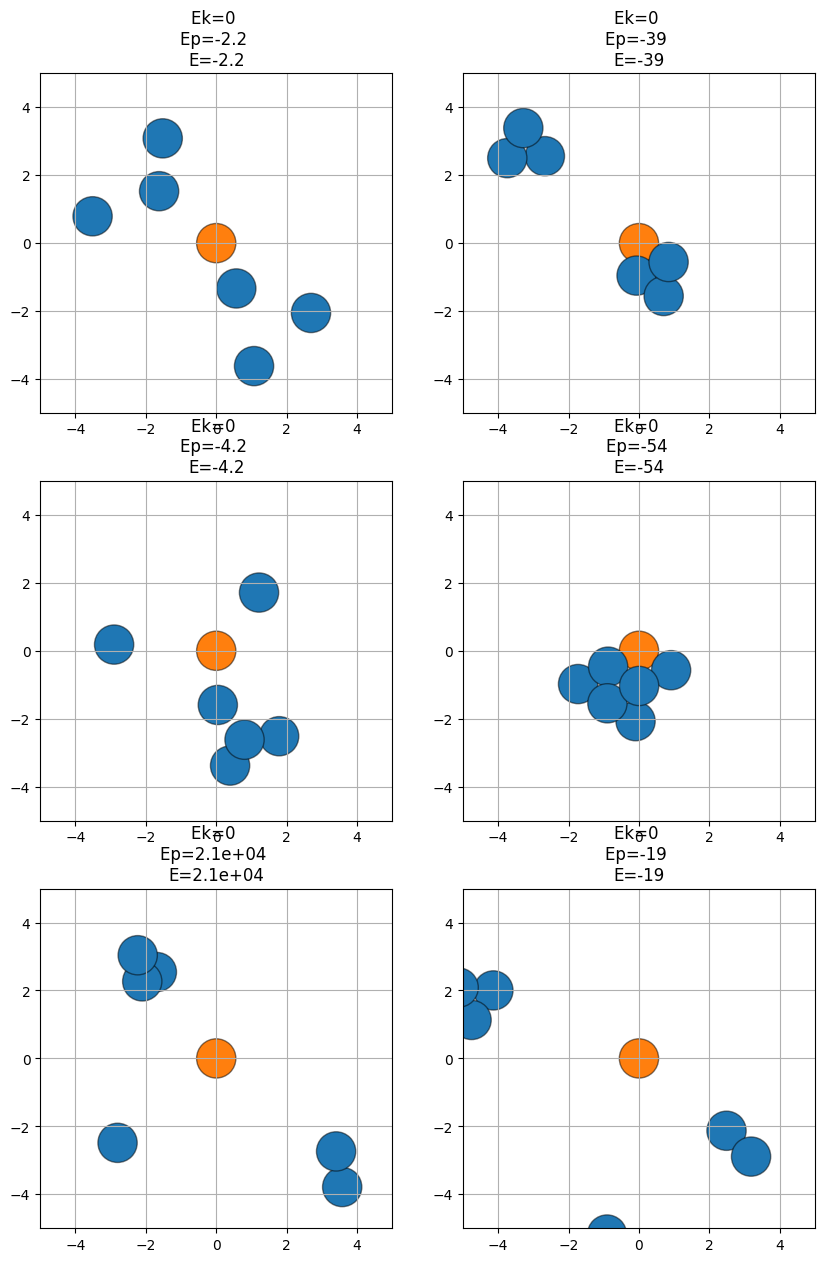

In [10]:
fig, ax = plt.subplots(3,2, figsize=(10,15))

for i in range(3):
    cluster = AtomicCluster(calc=LJ, N = 7)
    cluster.static[0] = True
    cluster.pos[0] = [0,0]
    
    ax[i,0].set(xlim= x_range, ylim= y_range)
    ax[i,0].grid()
    cluster.draw(ax[i,0], size=800)

    mcmc_nd(cluster, n_steps=50000, T=0.5)
    ax[i,1].set(xlim= x_range, ylim= y_range)
    ax[i,1].grid()
    cluster.draw(ax[i,1], size=800)


In [11]:
save_plot(fig, 'mcmc_7_cluster.png')